**Упражнение 10. Дополнение нулями последовательности.**

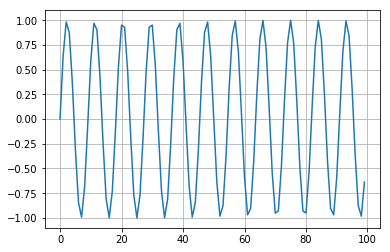

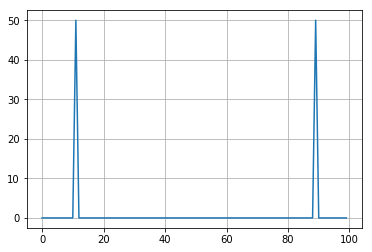

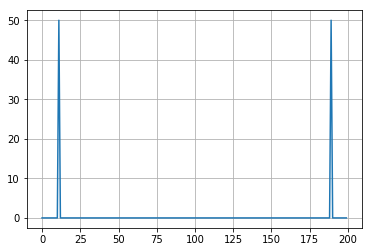

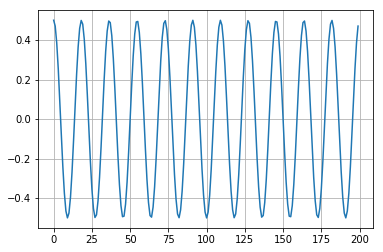

In [78]:
import numpy as np
import math
import matplotlib.pyplot as plt

P = 11
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array([])

Z = np.zeros(200)
w1 = 1

for t in range(N):
    X = np.append(X, math.sin(2*math.pi*w1*t*k))
#print(X)
plt.plot(X) 
plt.grid() 
plt.show() 

S = np.fft.fft(X) 
#freq = np.fft.fftfreq(N) 

plt.plot(abs(S)) 
plt.grid() 
plt.show()
#print(S)
for i in range(200):
    if (i < 45):
        Z[i] =  abs(S[i])
    if (55 < i < 99):
        Z[i+100] = abs(S[i])
rmeandr = np.fft.ifft(Z)

plt.plot(Z) 
plt.grid() 
plt.show()

plt.plot(rmeandr) 
plt.grid() 
plt.show()



**Упражнение 11. Децимация сигнала.**

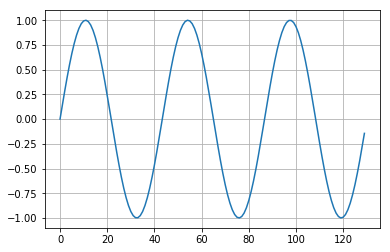

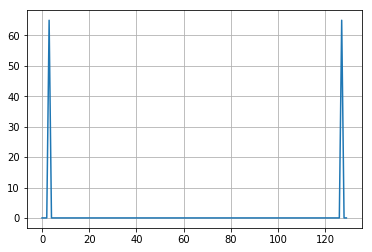

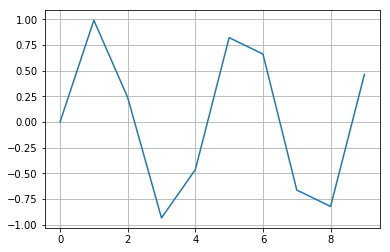

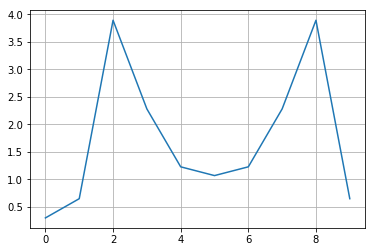

In [79]:
import numpy as np
import math
import matplotlib.pyplot as plt

YY = np.array([])
P = 3
#количество точек на графике
N = 130
k = P/N
#пустые массивы значений
D = np.zeros(10)
#D = np.array([])
w1 = 1
q = 10
i = 0
for i in range(N):
    YY = np.append(YY, math.sin(2*math.pi*w1*i*k))

plt.plot(YY) 
plt.grid() 
plt.show()

Yspectr = np.fft.fft(YY)
plt.plot(abs(Yspectr)) 
plt.grid() 
plt.show()
summ = 0
t = 0
for t in range(10):
    D[t] = YY[t * q]

plt.plot(D) 
plt.grid() 
plt.show()
Dspectr = np.fft.fft(D) 
plt.plot(abs(Dspectr)) 
plt.grid() 
plt.show()

**Упражнение 12. Вставка нулей между отчетами сигнала.**

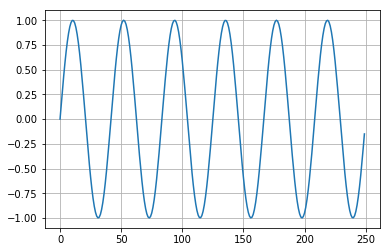

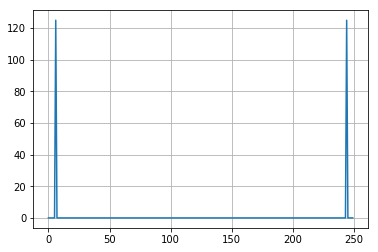

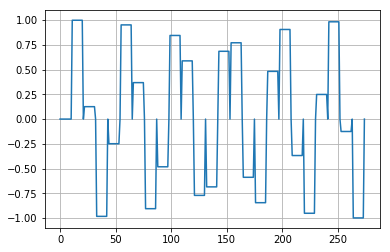

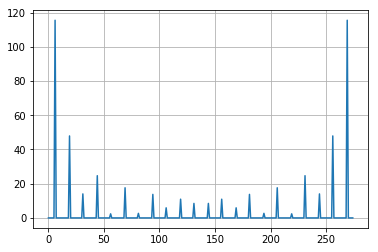

In [80]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import numpy as np
P = 6
#количество точек на графике
N = 250
k = P/N
q = 10
#пустые массивы значений
kof = int(N/q)
D = np.zeros(N + kof)
YY = np.array([])
sig = np.array([]) 
w1 = 1
i = 0
'''
t = np.linspace(0, 250, 250)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t, 0.5))
tre = signal.sawtooth(2 * np.pi * 5.5 * t, 0.5)
plt.grid() 
plt.show()
'''

for i in range(N):
    YY = np.append(YY, math.sin(2*math.pi*w1*i*k))

plt.plot(YY) 
plt.grid() 
plt.show()

YYspectr = np.fft.fft(YY)
plt.plot(abs(YYspectr)) 
plt.grid() 
plt.show()
i = 0
t = 0
a = 0
qw = 0
for i in range(int(len(YY)/q)):
    for t in range(q):
        D[i*q + a + t] = YY[i*q]
    a = a + 1
#print(D)
plt.plot(D) 
plt.grid() 
plt.show()

Dspectr = np.fft.fft(D)
plt.plot(abs(Dspectr)) 
plt.grid() 
plt.show()

**Упражнение 13. Влияние окна на спектр дополненного нулями
сигнала**

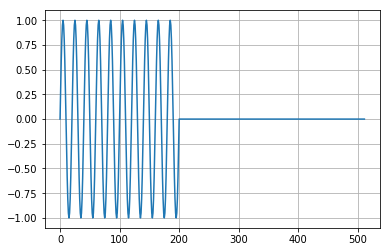

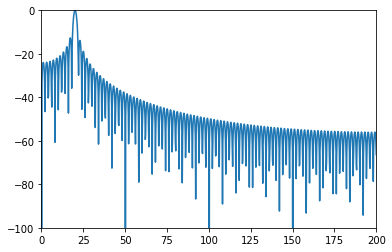

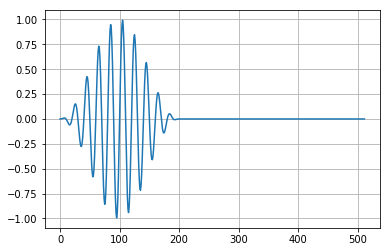

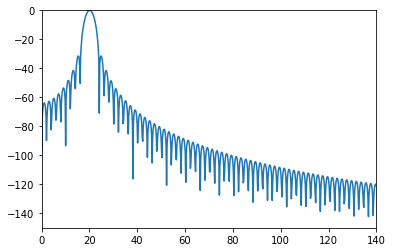

In [81]:
from scipy.fftpack import fft, fftshift
from scipy.signal import chirp, spectrogram
YY = np.array([])
P = 10
#количество точек на графике
N = 200
k = P/N
#пустые массивы значений
#D = np.array([])
w1 = 1
i = 0
for i in range(N+312):
    if (i > 200):
        YY = np.append(YY, 0)
    else:
        YY = np.append(YY, math.sin(2*math.pi*w1*i*k))
plt.plot(YY) 
plt.grid()
plt.show()

#YYspectr = np.fft.fft(YY)
#freq = np.fft.fftfreq(200) 
#plt.plot(freq, abs(YYspectr)) 
#plt.plot(abs(YYspectr))
#plt.grid() 
#plt.show()


window = signal.boxcar(0)
#print(window)
#plt.figure()
A = fft(YY, 2048) / (len(YY)/2.0)
freq = np.linspace(-200, 200, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([0,200, -100, 0])
plt.show()

window = signal.hann(200)
#print(len(window))
YYY = np.array([])
#D = np.array([])
w1 = 1
q = 10
i = 0
N = 200
for i in range(N+312):
    if (i > 199):
        YYY = np.append(YYY, 0)
    else:
        YYY = np.append(YYY, math.sin(2*math.pi*w1*i*k) * window[i])
plt.plot(YYY) 
plt.grid()
plt.show()

A = fft(YYY, 2048) / (len(YYY)/2.0)
freq1 = np.linspace(-200, 200, len(A))
response1 = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq1, response1)
plt.axis([0,140, -150, 0])
plt.show()

**Упражнение 14. Автокорреляционные функции некоторых
сигналов.**

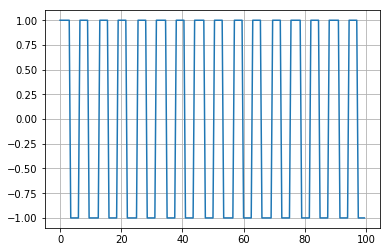

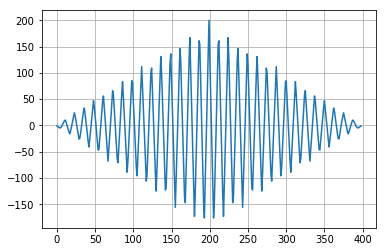

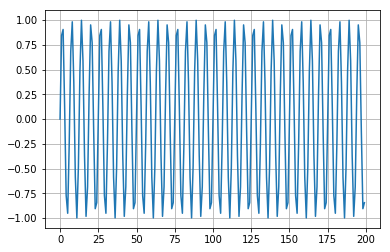

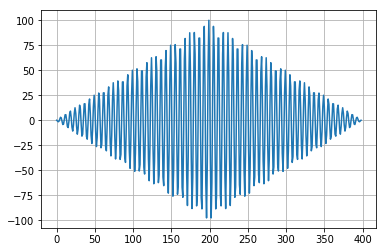

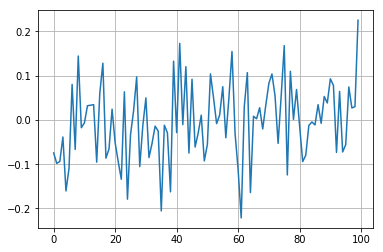

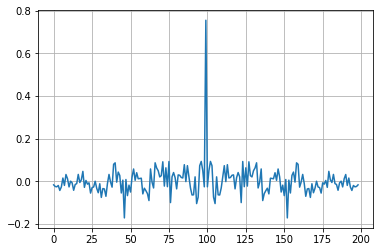

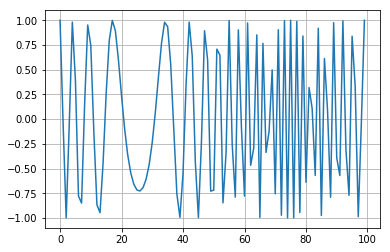

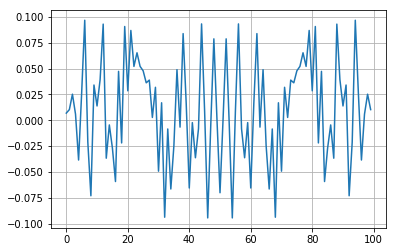

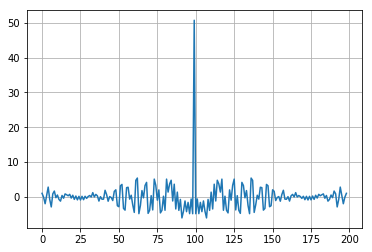

In [82]:
t = np.linspace(0, 100, 200, endpoint=False)
video = signal.square(t)
plt.plot(t, signal.square(t))
plt.grid() 
plt.show()

plt.plot(signal.correlate(video, video, mode='full', method = 'auto'))
plt.grid() 
plt.show()


P = 32
#количество точек на графике
N = 200
k = P/N
YY = np.array([])
w1 = 1
i = 0

for i in range(N):
    YY = np.append(YY, math.sin(2*math.pi*w1*i*k))
plt.plot(YY)
plt.grid() 
plt.show()
plt.plot(signal.correlate(YY, YY, mode='full', method = 'auto'))
plt.grid()
plt.show()

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

plt.plot(s) 
plt.grid() 
plt.show()

plt.plot(signal.correlate(s, s, mode='full', method = 'auto'))
plt.grid() 
plt.show()

t = np.linspace(0, 10, 100)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
plt.plot(w)
plt.grid() 
plt.show()

rmeandr = np.fft.ifft(w)
plt.plot(rmeandr)
plt.grid(True)
plt.show()

plt.plot(signal.correlate(w, w, mode='full', method = 'auto'))
plt.grid() 
plt.show()

**Упражнение 15. Выделение сложного сигнала в шуме при помощи
взаимнокорреляционной функции (ВКФ).**

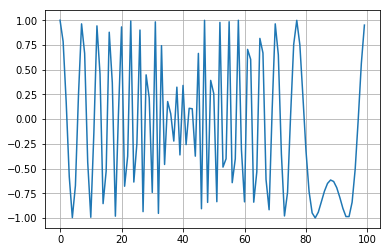

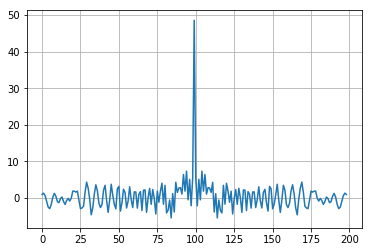

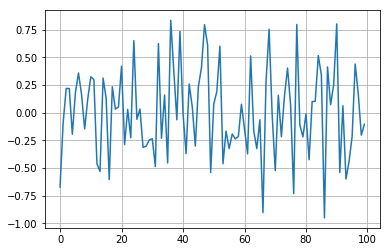

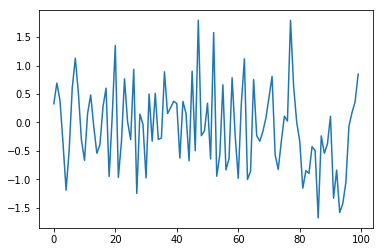

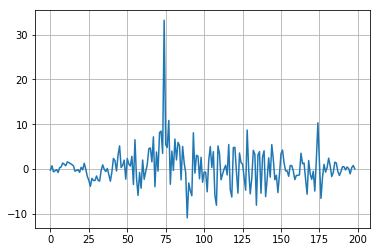

In [83]:
t = np.linspace(0, 10, 100)

lchm = chirp(t, f0=1, f1=1000, t1=1000, method='linear')
plt.plot(lchm)
plt.grid()
plt.show()

plt.plot(signal.correlate(lchm, lchm, mode='full', method = 'auto'))
plt.grid()
plt.show()

mu, sigma = 0, 0.4 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

plt.plot(s)
plt.grid()
plt.show()
i = 0
for i in range(len(s)):
    s[i] = s[i] + lchm[i]
plt.plot(s)
plt.show()
A = s[int(len(s)/4):]
B = s[:int(len(s)/4)]
C  = np.concatenate((A, B))
plt.plot(signal.correlate(C, lchm, mode='full', method = 'auto'))
plt.grid()
plt.show()

**Упражнение 16. Сравнение автокорреляции и свертки.
Использование свертки для нахождения «зеркальных» сигналов.**

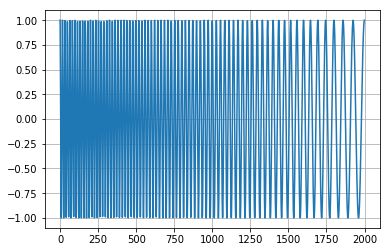

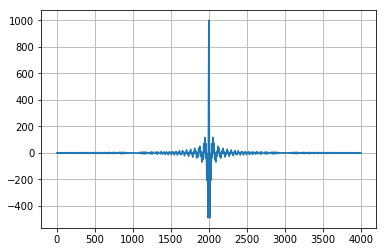

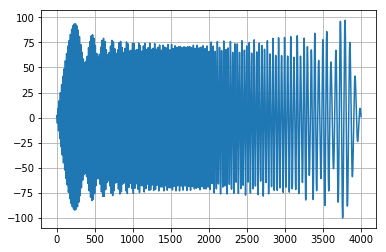

In [84]:
t = np.linspace(0, 10, 2000)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
plt.plot(w)
plt.grid() 
plt.show()
#print(w)
plt.plot(signal.correlate(w, w, mode='full', method = 'auto'))
plt.grid() 
plt.show()

plt.plot(np.convolve(w,w, 'full'))
plt.grid() 
plt.show()

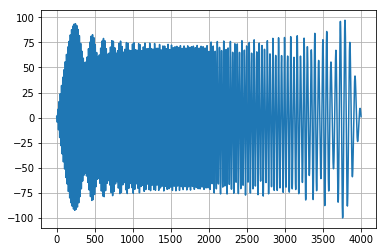

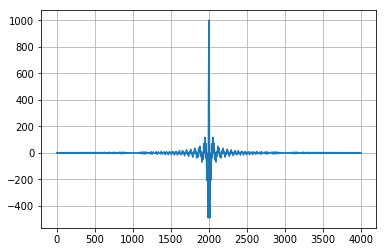

In [85]:
ww = []
i = 0
ww = w[slice(1999, 0, -1)]
plt.plot(signal.correlate(w, ww, mode='full', method = 'auto'))
plt.grid() 
plt.show()

plt.plot(np.convolve(w, ww, 'full'))
plt.grid() 
plt.show()

**Упражнение 17. Особенности фильтра Баттерворта**

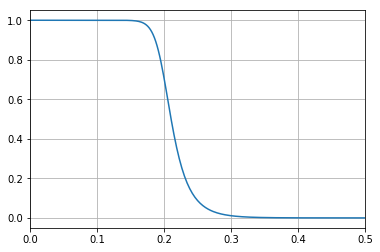

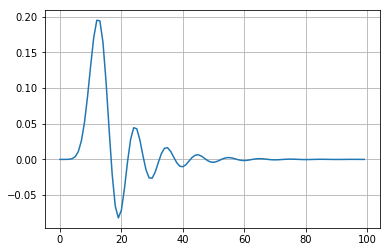

[-1.05418977+0.j         -1.04315428+0.03234048j -1.04315428-0.03234048j
 -1.01524199+0.05102348j -1.01524199-0.05102348j -0.98261609+0.04946803j
 -0.98261609-0.04946803j -0.95766315+0.02982153j -0.95766315-0.02982153j
 -0.94845921+0.j        ] [0.74089206+0.53166236j 0.74089206-0.53166236j 0.63860574+0.41340407j
 0.63860574-0.41340407j 0.57149025+0.2935992j  0.57149025-0.2935992j
 0.53094842+0.17512984j 0.53094842-0.17512984j 0.51185833+0.05817592j
 0.51185833-0.05817592j]


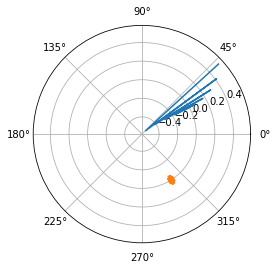

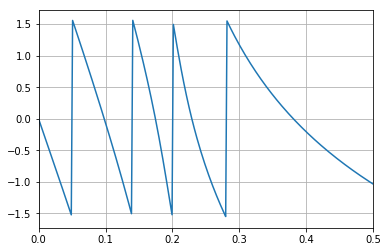

In [104]:
b, a = signal.butter(10, 0.2, 'low', analog=False)
w, h = signal.freqz(b, a)
z, p, k = signal.tf2zpk(b, a)
w = w/3.14
plt.plot(w, abs(h))
plt.grid()
plt.xlim([0, 0.5])
plt.show()



delta = np.zeros(100)
delta[1] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid()
plt.show()
print(z,p)
plt.polar(np.real(p), np.imag(p))
plt.polar( np.real(z), np.imag(z))
#plt.plot(np.imag(p), np.real(p), 'b')
plt.show()

plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.xlim([0, 0.5])
plt.grid()
plt.show()

**Упражнение 18. Особенности фильтра Чебышева I типа.**

In [ ]:
b, a = signal.cheby1(14, 0.2, 0.25, 'low', analog=False)
w, h = signal.freqz(b, a)
w = w/3.14
plt.plot(w, abs(h))
plt.grid()
plt.xlim([0, 0.5])
plt.show()

delta = np.zeros(100)
delta[1] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid()
plt.show()


plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.xlim([0, 0.5])
plt.grid()
plt.show()

**Упражнение 19. Особенности фильтра Чебышева II типа.
(инверсного Чебышева)**

In [ ]:
b, a = signal.cheby2(14, 24, 0.2, 'low', analog=False)
w, h = signal.freqz(b, a)
w = w/3.14
plt.plot(w, abs(h))
plt.grid()
plt.xlim([0, 0.5])
plt.show()

delta = np.zeros(100)
delta[1] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid()
plt.show()


plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.xlim([0, 0.5])
plt.grid()
plt.show()

**Упражнение 20. Особенности эллиптических фильтров**

In [ ]:
b, a = signal.ellip(4, 0.8, 23, 0.2, 'low', analog=False)
w, h = signal.freqz(b, a)
w = w/3.14
plt.plot(w, abs(h))
plt.grid()
plt.xlim([0, 0.5])
plt.show()

delta = np.zeros(100)
delta[1] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid()
plt.show()


plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.xlim([0, 0.5])
plt.grid()
plt.show()

**Упражнение 21. Особенности фильтра Бесселя**

In [ ]:
b, a = signal.bessel(6, 0.25, 'low', analog=False)
w, h = signal.freqz(b, a)
w = w/3.14
plt.plot(w, abs(h))
plt.grid()
plt.xlim([0, 0.5])
plt.show()

delta = np.zeros(100)
delta[1] = 1
imp = signal.lfilter(b, a, delta)
plt.plot(imp)
plt.grid()
plt.show()


plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.xlim([0, 0.5])
plt.grid()
plt.show()